<a href="https://colab.research.google.com/github/spacemaninSeoul/road_to_NLPmaster/blob/main/Text_preprocessing_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

텍스트 전처리는 풀고자 하는 문제의 용도에 맞게 텍스트를 사전에 처리하는 작업이다.

# 1. 토큰화(Tokenization)

자연어 처리에서 크롤링 등으로 얻어낸 코퍼스 데이터가 필요에 맞게 전처리되지 않은 상태라면, 해당 데이터를 사용하고자하는 용도에 맞게 토큰화(tokenization) & 정제(cleaning) & 정규화(normalization) 하는 일을 하게 된다. 그 중에 토큰화에 대해 학습하도록 한다.

토큰화(Tokenization)은 주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 말한다. 토큰의 단위는 상황에 따라 다르긴 하나, 보통 의미있는 단위로 토큰을 정의한다.

## 1) 단어 토큰화(Word Tokenization)

토큰의 기준을 단어(word)로 하는 경우, 단어 토큰화(word tokenization)이라고 한다. 다만, 여기서 단어는 단어 단위 외에도 단어구, 의미를 갖는 문자열로도 간주되기도 한다.

예시로 구두점(punctuation)과 같은 문자는 제외시키는 간단한 단어 토큰화 작업을 진행해보자. 구두점이란 마침표(.), 컴마(,), 물음표(?), 세미콜론(;), 느낌표(!) 등과 같은 기호를 말한다.

입력: **Time is an illusion. Lunchtime double so!**

이러한 입력으로부터 구두점을 제외시킨 토큰화 작업의 결과는 다음과 같다.

출력 : "Time", "is", "an", "illustion", "Lunchtime", "double", "so"



## 2) 토큰화 중 생기는 선택의 순간

토큰화를 하다보면, 예상치 못한 경우에 토큰화의 기준을 생각해봐야 하는 경우가 발생한다. 물론 이러한 선택은 해당 다이터를 가지고 어떤 용도로 사용할 것인지에 따라 그 용도에 영향이 없는 기준으로 정하면 된다.

예를 들어 영어권 언어에서 아포스트로피를(')가 들어가있는 단어는 어떻게 토큰으로 분류해야 하는지에 대한 선택의 문제를 보여드리겠습니다.

다음과 같은 문장이 있다고 해봅시다.

**Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.**

아포스트로피가 들어간 상황에서 Don't와 Jone's는 어떻게 토큰화할 수 있을까? 다양한 선택지가 가능하다.

 - Don't
 - Don t
 - Dont
 - Do n't
 - Jone's
 - Jone s
 - Jone
 - Jones



이 중 사용자가 원하는 결과가 나오도록 토큰화 도구를 직접 설계할 수도 있겠지만, 기존에 공개된 도구들을 사용하였을 때의 결과가 사용자의 목적과 일치한다면 해당 도구를 사용할 수 있을 것이다. 그 중 NLTK는 영어 코퍼스를 토큰화하기 위한 도구들을 제공한다. 그 중 word_tokenize와 WordPunctTokenizer를 사용해서 아포스트로피를 어떻게 처리하는지 확인한다.



In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [ ]:
print('단어 토큰화1 : ', word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1 :  ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


word_tokenie는 Don't를 Do와 n't로 분리하였으며, 반면 Jone's는 Jone과 's로 분리한 것을 확인할 수 있습니다. 

In [ ]:
print('단어 토큰화2 : ', WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2 :  ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있기때문에, 앞서 확인했던 word_tokenize와는 달리 Don't를 Don과 '와 t로 분리하였으며, 이와 마찬가지로 Jone's를 Jone과 '와 s로 분리한 것을 확인할 수 있습니다. 케라스 또한 토큰화 도구로서 text_to_word_sequence를 지원합니다.



In [ ]:
print('단어 토큰화3 : ', text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화3 :  ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


케라스의 text_to_word_sequence는 기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 컴마, 느낌표 등의 구두점을 제거합니다. 하지만 don't나 jone's와 같은 경우 아포스트로피는 보존하는 것을 볼 수 있습니다.



## 3) 토큰화에서 고려해야 할 사항

토큰화 작업을 단순하게 코퍼스에서 구두점을 제외하고 공백 기준으로 잘라내는 작업으로 치부할 수는 없습니다. 상당히 섬세한 알고리즘이 필요한데 그 이유를 정리해봅니다.

### (1) 구두점이나 특수 문자를 단순 제외해서는 안 된다.
갖고있는 코퍼스에서 단어들을 걸러낼 때, 구두점이나 특수 문자를 단순히 제외하는 것은 옳지 않습니다. 코퍼스에 대한 정제 작업을 진행하다보면, 구두점조차도 하나의 토큰으로 분류하기도 합니다. 가장 기본적인 예를 들어보자면, 마침표(.)와 같은 경우는 문장의 경계를 알 수 있는데 도움이 되므로 단어를 뽑아낼 때, 마침표(.)를 제외하지 않을 수 있습니다.

또 다른 예로 단어 자체에 구두점을 갖고 있는 경우도 있는데, m.p.h나 Ph.D나 AT&T 같은 경우가 있습니다. 또 특수 문자의 달러()나 슬래시(/)로 예를 들어보면, $45.55와 같은 가격을 의미 하기도 하고, 01/02/06은 날짜를 의미하기도 합니다. 보통 이런 경우 45.55를 하나로 취급하고 45와 55로 따로 분류하고 싶지는 않을 수 있습니다.

숫자 사이에 컴마(,)가 들어가는 경우도 있습니다. 보통 수치를 표현할 때는 123,456,789와 같이 세 자리 단위로 컴마가 있습니다.

### (2) 줄임말과 단어 내에 띄어쓰기가 있는 경우.
토큰화 작업에서 종종 영어권 언어의 아포스트로피(')는 압축된 단어를 다시 펼치는 역할을 하기도 합니다. 예를 들어 what're는 what are의 줄임말이며, we're는 we are의 줄임말입니다. 위의 예에서 re를 접어(clitic)이라고 합니다. 즉, 단어가 줄임말로 쓰일 때 생기는 형태를 말합니다. 가령 I am을 줄인 I'm이 있을 때, m을 접어라고 합니다.

New York이라는 단어나 rock 'n' roll이라는 단어를 봅시다. 이 단어들은 하나의 단어이지만 중간에 띄어쓰기가 존재합니다. 사용 용도에 따라서, 하나의 단어 사이에 띄어쓰기가 있는 경우에도 하나의 토큰으로 봐야하는 경우도 있을 수 있으므로, 토큰화 작업은 저러한 단어를 하나로 인식할 수 있는 능력도 가져야합니다.

### (3) 표준 토큰화 예제

이해를 돕기 위해 표준으로 쓰이고 있는 토큰화 방법 중 하나인 Penn Treebank Tokenization의 규칙에 대해서 소개하고, 토큰화의 결과를 확인해보겠습니다.

 - 규칙 1. 하이픈으로 구성된 단어는 하나로 유지한다.
 - 규칙 2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.

해당 표준에 아래의 문장을 입력으로 넣어봅니다.
"Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."



In [ ]:
from nltk import tokenize
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."

print('트리뱅크 워드토크나이저 : ', tokenizer.tokenize(text))

트리뱅크 워드토크나이저 :  ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


결과를 보면, 각각 규칙1과 규칙2에 따라서 home-based는 하나의 토큰으로 취급하고 있으며, dosen't의 경우 does와 n't는 분리되었음을 볼 수 있습니다.



## 4) 문장 토큰화(Sentence Tokenization)

이번에는 토큰의 단위가 문장(sentence)일 경우를 논의해보겠습니다. 이 작업은 갖고있는 코퍼스 내에서 문장 단위로 구분하는 작업으로 때로는 문장 분류(sentence segmentation)라고도 부릅니다. 보통 갖고있는 코퍼스가 정제되지 않은 상태라면, 코퍼스는 문장 단위로 구분되어 있지 않아서 이를 사용하고자 하는 용도에 맞게 문장 토큰화가 필요할 수 있습니다.

어떻게 주어진 코퍼스로부터 문장 단위로 분류할 수 있을까요? 직관적으로 생각해봤을 때는 ?나 마침표(.)나 ! 기준으로 문장을 잘라내면 되지 않을까라고 생각할 수 있지만, 꼭 그렇지만은 않습니다. !나 ?는 문장의 구분을 위한 꽤 명확한 구분자(boundary) 역할을 하지만 마침표는 그렇지 않기 때문입니다. 마침표는 문장의 끝이 아니더라도 등장할 수 있습니다.

**EX1) IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 aaa@gmail.com로 결과 좀 보내줘. 그 후 점심 먹으러 가자.**

**EX2) Since I'm actively looking for Ph.D. students, I get the same question a dozen times every year.**

예를 들어 위의 예제에 마침표를 기준으로 문장 토큰화를 적용해본다면 어떨까요? 첫번째 예제에서는 보내줘.에서 그리고 두번째 예제에서는 year.에서 처음으로 문장이 끝난 것으로 인식하는 것이 제대로 문장의 끝을 예측했다고 볼 수 있습니다. 하지만 단순히 마침표(.)로 문장을 구분짓는다고 가정하면, 문장의 끝이 나오기 전에 이미 마침표가 여러번 등장하여 예상한 결과가 나오지 않게 됩니다.

사용하는 코퍼스가 어떤 국적의 언어인지, 또는 해당 코퍼스 내에서 특수문자들이 어떻게 사용되고 있는지에 따라서 직접 규칙들을 정의해볼 수 있겠습니다. 100% 정확도를 얻는 일은 쉬운 일이 아닌데, 갖고있는 코퍼스 데이터에 오타나, 문장의 구성이 엉망이라면 정해놓은 규칙이 소용이 없을 수 있기 때문입니다.

NLTK에서는 영어 문장의 토큰화를 수행하는 sent_tokenize를 지원하고 있습니다. NLTK를 통해 문장 토큰화를 실습해보겠습니다.



In [ ]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."

print('문장 토큰화1 : ', sent_tokenize(text))

문장 토큰화1 :  ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


위 코드는 text에 저장된 여러 개의 문장들로부터 문장을 구분하는 코드입니다. 출력 결과를 보면 성공적으로 모든 문장을 구분해내었음을 볼 수 있습니다. 그렇다면 이번에는 문장 중간에 마침표가 다수 등장하는 경우에 대해서도 실습해보겠습니다.



In [ ]:
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."

print('문장 토큰화2 : ', sent_tokenize(text))

문장 토큰화2 :  ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


NLTK는 단순히 마침표를 구분자로 하여 문장을 구분하지 않았기 때문에, Ph.D.를 문장 내의 단어로 인식하여 성공적으로 인식하는 것을 볼 수 있습니다. 한국어에 대한 문장 토큰화 도구 또한 존재합니다. 한국어의 경우에는 박상길님이 개발한 KSS(Korean Sentence Splitter)를 추천합니다. 다음과 같이 KSS를 설치합니다.



In [ ]:
pip install kss

In [ ]:
import kss

text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'

print('한국어 문장 토큰화 : ', kss.split_sentences(text))

한국어 문장 토큰화 :  ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


## 5) 한국어에서의 토큰화의 어려움

영어는 New York과 같은 합성어나 he's 와 같이 줄임말에 대한 예외처리만 한다면, 띄어쓰기(whitespace)를 기준으로 하는 띄어쓰기 토큰화를 수행해도 단어 토큰화가 잘 작동합니다. 거의 대부분의 경우에서 단어 단위로 띄어쓰기가 이루어지기 때문에 띄어쓰기 토큰화와 단어 토큰화가 거의 같기 때문입니다.

하지만 한국어는 영어와는 달리 띄어쓰기만으로는 토큰화를 하기에 부족합니다. 한국어의 경우에는 띄어쓰기 단위가 되는 단위를 '어절'이라고 하는데 어절 토큰화는 한국어 NLP에서 지양되고 있습니다. 어절 토큰화와 단어 토큰화는 같지 않기 때문입니다. 그 근본적인 이유는 한국어가 영어와는 다른 형태를 가지는 언어인 교착어라는 점에서 기인합니다. 교착어란 조사, 어미 등을 붙여서 말을 만드는 언어를 말합니다.



### (1) 교착어의 특성

교착어란 언어의 형태적 유형의 하나. 실질적인 의미를 가진 단어 또는 어간에 문법적인 기능을 가진 요소가 차례로 결합함으로써 문장 속에서의 문법적인 역할이나 관계의 차이를 나타내는 언어로, 한국어ㆍ터키어ㆍ일본어ㆍ핀란드어 따위가 여기에 속한다.


예를 들어봅시다. 영어와는 달리 한국어에는 조사라는 것이 존재합니다. 예를 들어 한국어에 그(he/him)라는 주어나 목적어가 들어간 문장이 있다고 합시다. 이 경우, 그라는 단어 하나에도 '그가', '그에게', '그를', '그와', '그는'과 같이 다양한 조사가 '그'라는 글자 뒤에 띄어쓰기 없이 바로 붙게됩니다. 자연어 처리를 하다보면 같은 단어임에도 서로 다른 조사가 붙어서 다른 단어로 인식이 되면 자연어 처리가 힘들고 번거로워지는 경우가 많습니다. 대부분의 한국어 NLP에서 조사는 분리해줄 필요가 있습니다.

띄어쓰기 단위가 영어처럼 독립적인 단어라면 띄어쓰기 단위로 토큰화를 하면 되겠지만 한국어는 어절이 독립적인 단어로 구성되는 것이 아니라 조사 등의 무언가가 붙어있는 경우가 많아서 이를 전부 분리해줘야 한다는 의미입니다.

한국어 토큰화에서는 **형태소(morpheme)** 란 개념을 반드시 이해해야 합니다. 형태소(morpheme)란 뜻을 가진 가장 작은 말의 단위를 말합니다. 이 형태소에는 두 가지 형태소가 있는데 자립 형태소와 의존 형태소입니다.

 - **자립 형태소** : 접사, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소. 그 자체로 단어가 된다. 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등이 있다.
 - **의존 형태소** : 다른 형태소와 결합하여 사용되는 형태소. 접사, 어미, 조사, 어간를 말한다.
예를 들어 다음과 같은 문장이 있다고 합시다.

 - 문장 : 에디가 책을 읽었다
이 문장을 띄어쓰기 단위 토큰화를 수행한다면 다음과 같은 결과를 얻습니다.

 - ['에디가', '책을', '읽었다']
하지만 이를 형태소 단위로 분해하면 다음과 같습니다.

자립 형태소 : 에디, 책
의존 형태소 : -가, -을, 읽-, -었, -다

'에디'라는 사람 이름과 '책'이라는 명사를 얻어낼 수 있습니다. 이를 통해 유추할 수 있는 것은 한국어에서 영어에서의 단어 토큰화와 유사한 형태를 얻으려면 어절 토큰화가 아니라 형태소 토큰화를 수행해야한다는 겁니다.



### (2) 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.

사용하는 한국어 코퍼스가 뉴스 기사와 같이 띄어쓰기를 철저하게 지키려고 노력하는 글이라면 좋겠지만, 많은 경우에 띄어쓰기가 틀렸거나 지켜지지 않는 코퍼스가 많습니다.

한국어는 영어권 언어와 비교하여 띄어쓰기가 어렵고 잘 지켜지지 않는 경향이 있습니다. 그 이유는 여러 견해가 있으나, 가장 기본적인 견해는 한국어의 경우 띄어쓰기가 지켜지지 않아도 글을 쉽게 이해할 수 있는 언어라는 점입니다. 띄어쓰기가 없던 한국어에 띄어쓰기가 보편화된 것도 근대(1933년, 한글맞춤법통일안)의 일입니다. 띄어쓰기를 전혀 하지 않은 한국어와 영어 두 가지 경우를 봅시다.

**EX1) 제가이렇게띄어쓰기를전혀하지않고글을썼다고하더라도글을이해할수있습니다.**

**EX2) Tobeornottobethatisthequestion**

영어의 경우에는 띄어쓰기를 하지 않으면 손쉽게 알아보기 어려운 문장들이 생깁니다. 이는 한국어(모아쓰기 방식)와 영어(풀어쓰기 방식)라는 언어적 특성의 차이에 기인합니다. 이 책에서는 모아쓰기와 풀어쓰기에 대한 설명은 하지 않겠습니다. 다만, 결론적으로 한국어는 수많은 코퍼스에서 띄어쓰기가 무시되는 경우가 많아 자연어 처리가 어려워졌다는 것입니다.




## 6) 품사 태깅(Part-of-speech tagging)

단어는 표기는 같지만 품사에 따라서 단어의 의미가 달라지기도 합니다. 예를 들어서 영어 단어 'fly'는 동사로는 '날다'라는 의미를 갖지만, 명사로는 '파리'라는 의미를 갖고있습니다. 한국어도 마찬가지입니다. '못'이라는 단어는 명사로서는 망치를 사용해서 목재 따위를 고정하는 물건을 의미합니다. 하지만 부사로서의 '못'은 '먹는다', '달린다'와 같은 동작 동사를 할 수 없다는 의미로 쓰입니다. 결국 단어의 의미를 제대로 파악하기 위해서는 해당 단어가 어떤 품사로 쓰였는지 보는 것이 주요 지표가 될 수도 있습니다. 그에 따라 단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지를 구분해놓기도 하는데, 이 작업을 품사 태깅(part-of-speech tagging)이라고 합니다. NLTK와 KoNLPy를 통해 품사 태깅 실습을 진행합니다.



## 7) NLTK와 KoNLPy를 이용한 영어, 한국어 토큰화 실습

NLTK에서는 Penn Treebank POS Tags라는 기준을 사용하여 품사를 태깅합니다.

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)
  
print('단어 토큰화 : ', tokenized_sentence)
print('품사 태깅 : ', pos_tag(tokenized_sentence))

단어 토큰화 :  ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 :  [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


영어 문장에 대해서 토큰화를 수행한 결과를 입력으로 품사 태깅을 수행하였습니다. Penn Treebank POG Tags에서 PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미합니다.



한국어 자연어 처리를 위해서는 KoNLPy(코엔엘파이)라는 파이썬 패키지를 사용할 수 있습니다. 코엔엘파이를 통해서 사용할 수 있는 형태소 분석기로 Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)가 있습니다.

한국어 NLP에서 형태소 분석기를 사용하여 단어 토큰화. 더 정확히는 형태소 토큰화(morpheme tokenization)를 수행해보겠습니다. 여기서는 Okt와 꼬꼬마 두 개의 형태소 분석기를 사용하여 토큰화를 수행하겠습니다.



In [ ]:
pip insatall konlpy

     |████████████████████████████████| 19.4 MB 3.2 MB/s 
     |████████████████████████████████| 448 kB 49.3 MB/s 


In [ ]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석 : ', okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 : ', okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 : ', okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

OKT 형태소 분석 :  ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 :  [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 :  ['코딩', '당신', '연휴', '여행']


위의 예제는 Okt 형태소 분석기로 토큰화를 시도해본 예제입니다. 각각의 메소드는 아래와 같은 기능을 갖고 있습니다.

  1) morphs : 형태소 추출

  2) pos : 품사 태깅(Part-of-speech tagging)
  
  3) nouns : 명사 추출

앞서 언급한 코엔엘파이의 형태소 분석기들은 공통적으로 이 메소드들을 제공하고 있습니다. 위 예제에서 형태소 추출과 품사 태깅 메소드의 결과를 보면 조사를 기본적으로 분리하고 있음을 확인할 수 있습니다. 한국어 NLP에서 전처리에 형태소 분석기를 사용하는 것은 굉장히 유용합니다. 이번에는 꼬꼬마 형태소 분석기를 사용하여 같은 문장에 대해서 토큰화를 진행해봅시다.



In [ ]:
print('꼬꼬마 형태소 분석 : ', kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 : ', kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 : ', kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

꼬꼬마 형태소 분석 :  ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 :  [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 :  ['코딩', '당신', '연휴', '여행']


앞서 사용한 Okt 형태소 분석기와 결과가 다른 것을 볼 수 있습니다. 각 형태소 분석기는 성능과 결과가 다르게 나오기 때문에, 형태소 분석기의 선택은 사용하고자 하는 필요 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 됩니다. 예를 들어서 속도를 중시한다면 메캅을 사용할 수 있습니다.



# 2. 정제(Cleaning) and 정규화(Normalization)

코퍼스에서 용도에 맞게 토큰을 분류하는 작업을 **토큰화(tokenization)**라고 하며, 토큰화 작업 전, 후에는 텍스트 데이터를 용도에 맞게 정제(cleaning) 및 정규화(normalization)하는 일이 항상 함께합니다. 정제 및 정규화의 목적은 각각 다음과 같습니다.

- **정제(cleaning)** : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거한다.
- **정규화(normalization)** : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다.

정제 작업은 토큰화 작업에 방해가 되는 부분들을 배제시키고 토큰화 작업을 수행하기 위해서 토큰화 작업보다 앞서 이루어지기도 하지만, 토큰화 작업 이후에도 여전히 남아있는 노이즈들을 제거하기위해 지속적으로 이루어지기도 합니다. 사실 완벽한 정제 작업은 어려운 편이라서, 대부분의 경우 이 정도면 됐다.라는 일종의 합의점을 찾기도 합니다.



## 1) 규칙에 기반한 표기가 다른 단어들의 통합

필요에 따라 직접 코딩을 통해 정의할 수 있는 정규화 규칙의 예로서 같은 의미를 갖고있음에도, 표기가 다른 단어들을 하나의 단어로 정규화하는 방법을 사용할 수 있습니다.

가령, USA와 US는 같은 의미를 가지므로 하나의 단어로 정규화해볼 수 있습니다. uh-huh와 uhhuh는 형태는 다르지만 여전히 같은 의미를 갖고 있습니다. 이러한 정규화를 거치게 되면, US를 찾아도 USA도 함께 찾을 수 있을 것입니다. 뒤에서 표기가 다른 단어들을 통합하는 방법인 어간 추출(stemming)과 표제어 추출(lemmatizaiton)에 대해서 더 자세히 알아봅니다.




## 2) 대, 소문자 통합

영어권 언어에서 대, 소문자를 통합하는 것은 단어의 개수를 줄일 수 있는 또 다른 정규화 방법입니다. 영어권 언어에서 대문자는 문장의 맨 앞 등과 같은 특정 상황에서만 쓰이고, 대부분의 글은 소문자로 작성되기 때문에 대, 소문자 통합 작업은 대부분 대문자를 소문자로 변환하는 소문자 변환작업으로 이루어지게 됩니다.

소문자 변환이 왜 유용한지 예를 들어보도록 하겠습니다. 가령, Automobile이라는 단어가 문장의 첫 단어였기때문에 A가 대문자였다고 생각해봅시다. 여기에 소문자 변환을 사용하면, automobile을 찾는 질의(query)의 결과로서 Automobile도 찾을 수 있게 됩니다. 검색 엔진에서 사용자가 페라리 차량에 관심이 있어서 페라리를 검색해본다고 합시다. 엄밀히 말해서 사실 사용자가 검색을 통해 찾고자하는 결과는 a Ferrari car라고 봐야합니다. 하지만 검색 엔진은 소문자 변환을 적용했을 것이기 때문에 ferrari만 쳐도 원하는 결과를 얻을 수 있을 것입니다.

물론 대문자와 소문자를 무작정 통합해서는 안 됩니다. 대문자와 소문자가 구분되어야 하는 경우도 있습니다. 가령 미국을 뜻하는 단어 US와 우리를 뜻하는 us는 구분되어야 합니다. 또 회사 이름(General Motors)나, 사람 이름(Bush) 등은 대문자로 유지되는 것이 옳습니다.

모든 토큰을 소문자로 만드는 것이 문제를 가져온다면, 또 다른 대안은 일부만 소문자로 변환시키는 방법도 있습니다. 가령, 이런 규칙은 어떨까요? 문장의 맨 앞에서 나오는 단어의 대문자만 소문자로 바꾸고, 다른 단어들은 전부 대문자인 상태로 놔두는 것입니다.

이러한 작업은 더 많은 변수를 사용해서 소문자 변환을 언제 사용할지 결정하는 머신 러닝 시퀀스 모델로 더 정확하게 진행시킬 수 있습니다. 하지만 만약 올바른 대문자 단어를 얻고 싶은 상황에서 훈련에 사용하는 코퍼스가 사용자들이 단어의 대문자, 소문자의 올바른 사용 방법과 상관없이 소문자를 사용하는 사람들로부터 나온 데이터라면 이러한 방법 또한 그다지 도움이 되지 않을 수 있습니다. 결국에는 예외 사항을 크게 고려하지 않고, 모든 코퍼스를 소문자로 바꾸는 것이 종종 더 실용적인 해결책이 되기도 합니다.

## 3) 불필요한 단어의 제거

정제 작업에서 제거해야하는 **노이즈 데이터(noise data)**는 자연어가 아니면서 아무 의미도 갖지 않는 글자들(특수 문자 등)을 의미하기도 하지만, 분석하고자 하는 목적에 맞지 않는 불필요 단어들을 노이즈 데이터라고 하기도 합니다.

불필요 단어들을 제거하는 방법으로는 불용어 제거와 등장 빈도가 적은 단어, 길이가 짧은 단어들을 제거하는 방법이 있습니다. 불용어 제거는 불용어 챕터에서 더욱 자세히 다루기로 하고, 여기서는 등장 빈도가 적은 단어와 길이가 짧은 단어를 제거하는 경우에 대해서 간략히 설명하겠습니다.



### (1) 등장 빈도가 적은 단어

때로는 텍스트 데이터에서 너무 적게 등장해서 자연어 처리에 도움이 되지 않는 단어들이 존재합니다. 예를 들어 입력된 메일이 정상 메일인지 스팸 메일인지를 분류하는 스팸 메일 분류기를 설계한다고 가정해보겠습니다. 총 100,000개의 메일을 가지고 정상 메일에서는 어떤 단어들이 주로 등장하고, 스팸 메일에서는 어떤 단어들이 주로 등장하는지를 가지고 설계하고자 합니다. 그런데 이때 100,000개의 메일 데이터에서 총 합 5번 밖에 등장하지 않은 단어가 있다면 이 단어는 직관적으로 분류에 거의 도움이 되지 않을 것임을 알 수 있습니다.




### (2) 등장 빈도가 적은 단어

영어권 언어에서는 길이가 짧은 단어를 삭제하는 것만으로도 어느정도 자연어 처리에서 크게 의미가 없는 단어들을 제거하는 효과를 볼 수 있다고 알려져 있습니다. 즉, 영어권 언어에서 길이가 짧은 단어들은 대부분 불용어에 해당됩니다. 사실 길이가 짧은 단어를 제거하는 2차 이유는 길이를 조건으로 텍스트를 삭제하면서 단어가 아닌 구두점들까지도 한꺼번에 제거하기 위함도 있습니다. 하지만 한국어에서는 길이가 짧은 단어라고 삭제하는 이런 방법이 크게 유효하지 않을 수 있는데 그 이유에 대해서 정리해보도록 하겠습니다.

단정적으로 말할 수는 없지만, 영어 단어의 평균 길이는 6~7 정도이며, 한국어 단어의 평균 길이는 2~3 정도로 추정되고 있습니다. 두 나라의 단어 평균 길이가 몇 인지에 대해서는 확실히 말하기 어렵지만 그럼에도 확실한 사실은 영어 단어의 길이가 한국어 단어의 길이보다는 평균적으로 길다는 점입니다.

이는 영어 단어와 한국어 단어에서 각 한 글자가 가진 의미의 크기가 다르다는 점에서 기인합니다. 한국어 단어는 한자어가 많고, 한 글자만으로도 이미 의미를 가진 경우가 많습니다. 예를 들어 '학교'라는 한국어 단어를 생각해보면, 배울 학(學)과 학교 교(校)로 글자 하나, 하나가 이미 함축적인 의미를 갖고있어 두 글자만으로 학교라는 단어를 표현합니다. 하지만 영어의 경우에는 학교라는 글자를 표현하기 위해서는 s, c, h, o, o, l이라는 총 6개의 글자가 필요합니다. 다른 예로는 전설 속 동물인 용(龍)을 표현하기 위해서는 한국어로는 한 글자면 충분하지만, 영어에서는 d, r, a, g, o, n이라는 총 6개의 글자가 필요합니다.

이러한 특성으로 인해 영어는 길이가 2~3 이하인 단어를 제거하는 것만으로도 크게 의미를 갖지 못하는 단어를 줄이는 효과를 갖고있습니다. 예를 들어 갖고 있는 텍스트 데이터에서 길이가 1인 단어를 제거하는 코드를 수행하면 대부분의 자연어 처리에서 의미를 갖지 못하는 단어인 관사 'a'와 주어로 쓰이는 'I'가 제거됩니다. 마찬가지로 길이가 2인 단어를 제거한다고 하면 it, at, to, on, in, by 등과 같은 대부분 불용어에 해당되는 단어들이 제거됩니다. 필요에 따라서는 길이가 3인 단어도 제거할 수 있지만, 이 경우 fox, dog, car 등 길이가 3인 명사들이 제거 되기시작하므로 사용하고자 하는 데이터에서 해당 방법을 사용해도 되는지에 대한 고민이 필요합니다.



In [ ]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2 글자인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


## 4) 정규 표현식(Regular Expression)

얻어낸 코퍼스에서 노이즈 데이터의 특징을 잡아낼 수 있다면, 정규 표현식을 통해서 이를 제거할 수 있는 경우가 많습니다. 가령, HTML 문서로부터 가져온 코퍼스라면 문서 여기저기에 HTML 태그가 있습니다. 뉴스 기사를 크롤링 했다면, 기사마다 게재 시간이 적혀져 있을 수 있습니다. 정규 표현식은 이러한 코퍼스 내에 계속해서 등장하는 글자들을 규칙에 기반하여 한 번에 제거하는 방식으로서 매우 유용합니다.

이 책에서도 전처리를 위해 정규 표현식을 앞으로 종종 사용하게 될 겁니다. 예를 들어 위에서 길이가 짧은 단어를 제거할 때도, 정규 표현식이 유용하게 사용되었습니다. 정규 표현식에 대한 자세한 내용은 뒤에서 좀 더 상세하게 다룹니다.



# 3. 어간 추출(Stemming) and 표제어 추출(Lemmatization)

정규화 기법 중 코퍼스에 있는 단어의 개수를 줄일 수 있는 기법인 표제어 추출(lemmatization)과 어간 추출(stemming)의 개념에 대해서 알아봅니다. 또한 이 둘의 결과가 어떻게 다른지 이해합니다.

이 두 작업이 갖고 있는 의미는 눈으로 봤을 때는 서로 다른 단어들이지만, 하나의 단어로 일반화시킬 수 있다면 하나의 단어로 일반화시켜서 문서 내의 단어 수를 줄이겠다는 것입니다. 이러한 방법들은 단어의 빈도수를 기반으로 문제를 풀고자 하는 뒤에서 학습하게 될 BoW(Bag of Words) 표현을 사용하는 자연어 처리 문제에서 주로 사용됩니다. **자연어 처리에서 전처리, 더 정확히는 정규화의 지향점은 언제나 갖고 있는 코퍼스로부터 복잡성을 줄이는 일입니다.**





## 1) 표제어 추출(Lemmatization)

**표제어(Lemma)**는 한글로는 '표제어' 또는 '기본 사전형 단어' 정도의 의미를 갖습니다. 표제어 추출은 단어들로부터 표제어를 찾아가는 과정입니다. 표제어 추출은 단어들이 다른 형태를 가지더라도, 그 뿌리 단어를 찾아가서 단어의 개수를 줄일 수 있는지 판단합니다. 예를 들어서 am, are, is는 서로 다른 스펠링이지만 그 뿌리 단어는 be라고 볼 수 있습니다. 이때, 이 단어들의 표제어는 be라고 합니다.

표제어 추출을 하는 가장 섬세한 방법은 단어의 형태학적 파싱을 먼저 진행하는 것입니다. **형태소**란 '의미를 가진 가장 작은 단위'를 뜻합니다. 그리고 **형태학(morphology)**이란 형태소로부터 단어들을 만들어가는 학문을 뜻합니다. 형태소의 종류로 어간(stem)과 접사(affix)가 존재합니다.

1. 어간(stem)
: 단어의 의미를 담고 있는 단어의 핵심 부분.

2. 접사(affix)
: 단어에 추가적인 의미를 주는 부분.

**형태학적 파싱**은 이 두 가지 구성 요소를 분리하는 작업을 말합니다. 가령, cats라는 단어에 대해 형태학적 파싱을 수행한다면, 형태학적 파싱은 결과로 cat(어간)와 -s(접사)를 분리합니다. 꼭 두 가지로 분리되지 않는 경우도 있습니다. 단어 fox는 형태학적 파싱을 한다고 하더라도 더 이상 분리할 수 없습니다. fox는 독립적인 형태소이기 때문입니다. 이와 유사하게 cat 또한 더 이상 분리되지 않습니다.

NLTK에서는 표제어 추출을 위한 도구인 WordNetLemmatizer를 지원합니다. 이를 통해 표제어 추출을 실습해보겠습니다.


In [ ]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전 : ', words)
print('표제어 추출 후 : ', [lemmatizer.lemmatize(word) for word in words])

표제어 추출 전 :  ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 :  ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


표제어 추출은 뒤에서 언급할 어간 추출과는 달리 단어의 형태가 적절히 보존되는 양상을 보이는 특징이 있습니다. 하지만 그럼에도 위의 결과에서는 dy나 ha와 같이 의미를 알 수 없는 적절하지 못한 단어를 출력하고 있습니다. 이는 표제어 추출기(lemmatizer)가 본래 단어의 품사 정보를 알아야만 정확한 결과를 얻을 수 있기 때문입니다.



WordNetLemmatizer는 입력으로 단어가 동사 품사라는 사실을 알려줄 수 있습니다. 즉, dies와 watched, has가 문장에서 동사로 쓰였다는 것을 알려준다면 표제어 추출기는 품사의 정보를 보존하면서 정확한 Lemma를 출력하게 됩니다.



In [ ]:
lemmatizer.lemmatize('dies', 'v')


'die'

In [ ]:
lemmatizer.lemmatize('watched', 'v')


'watch'

In [ ]:
lemmatizer.lemmatize('has', 'v')


'have'

표제어 추출은 문맥을 고려하며 수행했을 때의 결과는 해당 단어의 품사 정보를 보존합니다. 하지만 어간 추출을 수행한 결과는 품사 정보가 보존되지 않습니다. 더 정확히는 어간 추출을 한 결과는 사전에 존재하지 않는 단어일 경우가 많습니다.



## 2) 어간 추출(Stemming)

어간(Stem)을 추출하는 작업을 **어간 추출**(stemming)이라고 합니다. 어간 추출은 형태학적 분석을 단순화한 버전이라고 볼 수도 있고, 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 볼 수도 있습니다. 이 작업은 섬세한 작업이 아니기 때문에 어간 추출 후에 나오는 결과 단어는 사전에 존재하지 않는 단어일 수도 있습니다. 예제를 보면 쉽게 이해할 수 있습니다. 어간 추출 알고리즘 중 하나인 포터 알고리즘(Porter Algorithm)에 아래의 문자열을 입력으로 넣는다고 해봅시다.

This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes.



In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."

tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전 : ', tokenized_sentence)
print('어간 추출 후 : ', [stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전 :  ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 :  ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


규칙 기반의 접근을 하고 있으므로 어간 추출 후의 결과에는 사전에 없는 단어들도 포함되어 있습니다. 가령, 포터 알고리즘의 어간 추출은 이러한 규칙들을 가집니다.

ALIZE → AL

ANCE → 제거

ICAL → IC

위의 규칙에 따르면 좌측의 단어는 우측의 단어와 같은 결과를 얻게됩니다.

formalize → formal

allowance → allow

electricical → electric


실제 코드를 통해 확인해봅시다.



In [ ]:
words = ['formalize', 'allowance', 'electricical']

print('어간 추출 전 : ', words)
print('어간 추출 후 : ', [stemmer.stem(word) for word in words])

어간 추출 전 :  ['formalize', 'allowance', 'electricical']
어간 추출 후 :  ['formal', 'allow', 'electric']


※ Porter 알고리즘의 상세 규칙은 마틴 포터의 홈페이지에서 확인할 수 있다.

어간 추출 속도는 표제어 추출보다 일반적으로 빠른데, 포터 어간 추출기는 정밀하게 설계되어 정확도가 높으므로 영어 자연어 처리에서 어간 추출을 하고자 한다면 가장 준수한 선택입니다. NLTK에서는 포터 알고리즘 외에도 랭커스터 스태머(Lancaster Stemmer) 알고리즘을 지원합니다. 이번에는 포터 알고리즘과 랭커스터 스태머 알고리즘으로 각각 어간 추출을 진행했을 때, 이 둘의 결과를 비교해보겠습니다.



In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('어간 추출 전 : ', words)
print('포터 스테머의 어간 추출 후 :', [porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후 : ', [lancaster_stemmer.stem(w) for w in words])

어간 추출 전 :  ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후 : ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후 :  ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


동일한 단어들의 나열에 대해서 두 스태머는 전혀 다른 결과를 보여줍니다. 두 스태머 알고리즘은 서로 다른 알고리즘을 사용하기 때문입니다. 그렇기 때문에 이미 알려진 알고리즘을 사용할 때는, 사용하고자 하는 코퍼스에 스태머를 적용해보고 어떤 스태머가 해당 코퍼스에 적합한지를 판단한 후에 사용하여야 합니다.

이런 규칙에 기반한 알고리즘은 종종 제대로 된 일반화를 수행하지 못 할 수 있습니다. 어간 추출을 하고나서 일반화가 지나치게 되거나, 또는 덜 되거나 하는 경우입니다. 예를 들어 포터 알고리즘에서 organization을 어간 추출했을 때의 결과를 봅시다.

organization → organ

organization과 organ은 완전히 다른 단어 임에도 organization에 대해서 어간 추출을 했더니 organ이라는 단어가 나왔습니다. organ에 대해서 어간 추출을 한다고 하더라도 결과는 역시 organ이 되기 때문에, 두 단어에 대해서 어간 추출을 한다면 동일한 어간을 갖게 됩니다. 이는 의미가 동일한 경우에만 같은 단어를 얻기를 원하는 정규화의 목적에는 맞지 않습니다. 마지막으로 동일한 단어에 대해서 표제어 추출과 어간 추출을 각각 수행했을 때, 결과에서 어떤 차이가 있는지 간단한 예를 보겠습니다.

**Stemming**

am → am

the going → the go

having → hav


----

**Lemmatization**

am → be

the going → the going

having → have



## 3) 한국어에서의 어간 추출

한국어의 어간에 대해서 간략히 설명합니다. 한국어는 아래의 표와 같이 5언 9품사의 구조를 가지고 있습니다.

언	   |품사


---



체언|	명사, 대명사, 수사

수식언|	관형사, 부사

관계언|	조사

독립언|	감탄사

**용언**|	**동사, 형용사**

이 중 용언에 해당되는 '동사'와 '형용사'는 어간(stem)과 어미(ending)의 결합으로 구성됩니다. 앞으로 **용언**이라고 언급하는 부분은 전부 동사와 형용사를 포함하여 언급하는 개념입니다.




### (1) 활용(conjugation)

활용(conjugation)은 한국어에서만 가지는 특징이 아니라, 인도유럽어(indo-european language)에서도 주로 볼 수 있는 언어적 특징 중 하나를 말하는 통칭적인 개념입니다. 다만, 여기서는 한국어에 한정하여 설명합니다.

**활용**이란 용언의 어간(stem)이 어미(ending)를 가지는 일을 말합니다.

**어간(stem)** : 용언(동사, 형용사)을 활용할 때, 원칙적으로 모양이 변하지 않는 부분. 활용에서 어미에 선행하는 부분. 때론 어간의 모양도 바뀔 수 있음(예: 긋다, 긋고, 그어서, 그어라).

**어미(ending)**: 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분이며, 여러 문법적 기능을 수행

활용은 어간이 어미를 취할 때, 어간의 모습이 일정하다면 규칙 활용, 어간이나 어미의 모습이 변하는 불규칙 활용으로 나뉩니다.



### (2) 규칙 활용

**규칙 활용**은 어간이 어미를 취할 때, 어간의 모습이 일정합니다. 아래의 예제는 어간과 어미가 합쳐질 때, 어간의 형태가 바뀌지 않음을 보여줍니다.


```
잡/어간 + 다/어미

```

이 경우에는 어간이 어미가 붙기전의 모습과 어미가 붙은 후의 모습이 같으므로, 규칙 기반으로 어미를 단순히 분리해주면 어간 추출이 됩니다.



### (3) 불규칙 활용

**불규칙 활용**은 어간이 어미를 취할 때 어간의 모습이 바뀌거나 취하는 어미가 특수한 어미일 경우를 말합니다.

예를 들어 ‘듣-, 돕-, 곱-, 잇-, 오르-, 노랗-’ 등이 ‘듣/들-, 돕/도우-, 곱/고우-, 잇/이-, 올/올-, 노랗/노라-’와 같이 어간의 형식이 달라지는 일이 있거나 ‘오르+ 아/어→올라, 하+아/어→하여, 이르+아/어→이르러, 푸르+아/어→푸르러’와 같이 일반적인 어미가 아닌 특수한 어미를 취하는 경우 불규칙활용을 하는 예에 속합니다.

이 경우에는 어간이 어미가 붙는 과정에서 어간의 모습이 바뀌었으므로 단순한 분리만으로 어간 추출이 되지 않고 좀 더 복잡한 규칙을 필요로 합니다. 아래의 링크는 다양한 불규칙 활용의 예를 보여줍니다.

링크 : https://namu.wiki/w/한국어/불규칙%20활용



# 4. 불용어(Stopword)

갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요합니다. 여기서 큰 의미가 없다라는 것은 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들을 말합니다. 예를 들면, I, my, me, over, 조사, 접미사 같은 단어들은 문장에서는 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없는 경우가 있습니다. 이러한 단어들을 **불용어(stopword)**라고 하며, NLTK에서는 위와 같은 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의하고 있습니다.

물론 불용어는 개발자가 직접 정의할 수도 있습니다. 이번에는 영어 문장에서 NLTK가 정의한 영어 불용어를 제거하는 실습을 하고, 한국어 문장에서 직접 정의한 불용어를 제거해보겠습니다.

NLTK 실습에서는 1챕터에서 언급했듯이 NLTK Data가 필요합니다. 만약, 데이터가 없다는 에러가 발생 시에는 nltk.download(필요한 데이터)라는 커맨드를 통해 다운로드 할 수 있습니다.




In [ ]:
pip install nltk

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 6.2 MB/s 
     |████████████████████████████████| 448 kB 55.2 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

## 1) NLTK에서 불용어 확인하기

In [ ]:
stop_words_list = stopwords.words('english')
print('불용어 개수 : ', len(stop_words_list))
print('불용어 10개 출력 : ', stop_words_list[:10])

불용어 개수 :  179
불용어 10개 출력 :  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


stopwords.words("english")는 NLTK가 정의한 영어 불용어 리스트를 리턴합니다. 출력 결과가 100개 이상이기 때문에 여기서는 간단히 10개만 확인해보았습니다. 'i', 'me', 'my'와 같은 단어들을 NLTK에서 불용어로 정의하고 있음을 확인할 수 있습니다.



## 2) NLTK를 통해서 불용어 제거하기

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
example = "Family is not an important thing. It's everything."

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example)

result = []
for word in word_tokens:
  if word not in stop_words:
    result.append(word)

print('불용어 제거 전 : ', word_tokens)
print('불용어 제거 후 : ', result)

불용어 제거 전 :  ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 :  ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


위 코드는 "Family is not an important thing. It's everything."라는 임의의 문장을 정의하고, NLTK의 word_tokenize를 통해서 단어 토큰화를 수행합니다. 그리고 단어 토큰화 결과로부터 NLTK가 정의하고 있는 불용어를 제외한 결과를 출력하고 있습니다. 결과적으로 'is', 'not', 'an'과 같은 단어들이 문장에서 제거되었음을 볼 수 있습니다.



## 3) 한국어에서 불용어 제거하기

한국어에서 불용어를 제거하는 방법으로는 간단하게는 토큰화 후에 조사, 접속사 등을 제거하는 방법이 있습니다. 하지만 불용어를 제거하려고 하다보면 조사나 접속사와 같은 단어들뿐만 아니라 명사, 형용사와 같은 단어들 중에서 불용어로서 제거하고 싶은 단어들이 생기기도 합니다. 결국에는 사용자가 직접 불용어 사전을 만들게 되는 경우가 많습니다. 이번에는 직접 불용어를 정의해보고, 주어진 문장으로부터 사용자가 정의한 불용어 사전으로부터 불용어를 제거해보겠습니다. 아래의 불용어는 임의 선정한 것으로 실제 의미있는 선정 기준이 아닙니다.



In [ ]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 : ', word_tokens)
print('불용어 제거 후 : ', result)

불용어 제거 전 :  ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 :  ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


아래의 링크는 보편적으로 선택할 수 있는 한국어 불용어 리스트를 보여줍니다. 하지만 여전히 절대적인 기준은 아닙니다.

링크 : https://www.ranks.nl/stopwords/korean

불용어가 많은 경우에는 코드 내에서 직접 정의하지 않고 txt 파일이나 csv 파일로 정리해놓고 이를 불러와서 사용하기도 합니다.

추가 참고 가능한 한국어 불용어 리스트 : https://bab2min.tistory.com/544



# 5. 정규 표현식(Regular Expression)

텍스트 전처리에서 정규 표현식은 아주 유용한 도구입니다. 이번에는 파이썬에서 지원하고 있는 정규 표현식 모듈 re의 사용 방법과 NLTK를 통한 정규 표현식을 이용한 토큰화에 대해서 알아봅니다.



## 1) 정규 표현식 문법과 모듈 함수

파이썬에서는 정규 표현식 모듈 re을 지원하므로, 이를 이용하면 특정 규칙이 있는 텍스트 데이터를 빠르게 정제할 수 있습니다. 정규 표현식을 위해 사용되는 특수 문자와 모듈 함수에 대해서 표를 통해 정리해보겠습니다. 표만으로는 이해하기 어렵습니다. 표 아래의 실습과 표를 병행하여 이해하시는 것이 좋습니다.



### (1) 정규 표현식 문법

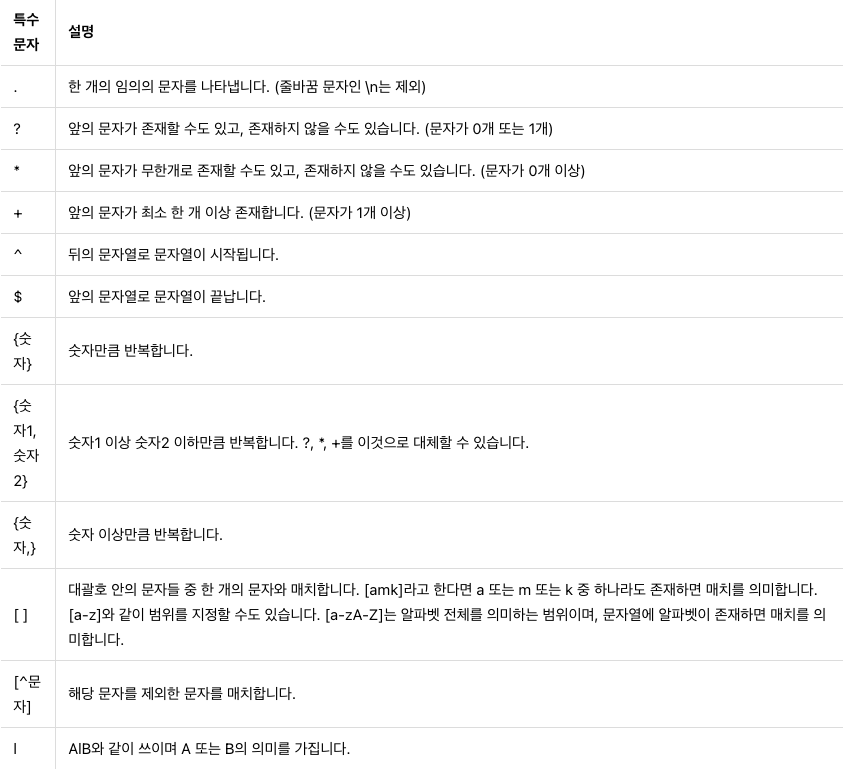

정규 표현식 문법에는 역 슬래쉬(\)를 이용하여 자주 쓰이는 문자 규칙들이 있습니다.



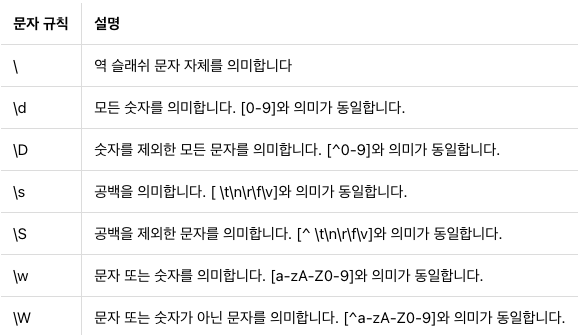

### (2) 정규표현식 모듈 함수

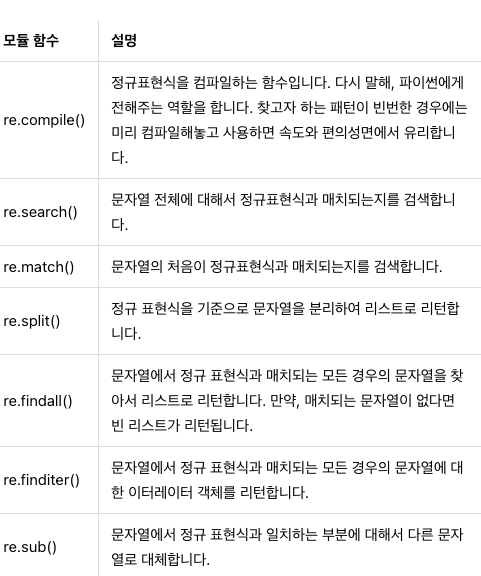

앞으로 진행될 실습에서는 re.compile()에 정규 표현식을 컴파일하고, re.search()를 통해서 해당 정규 표현식이 입력 텍스트와 매치되는지를 확인하면서 각 정규 표현식에 대해서 이해해보겠습니다. re.search()는 매치된다면 Match Object를 리턴하고 매치되지 않으면 아무런 값도 출력되지 않습니다.



## 2) 정규 표현식 실습

앞서 표로 봤던 정규 표현식을 예시를 통해 이해해보겠습니다.

In [ ]:
import re

### (1) . 기호

.은 한 개의 임의의 문자를 나타냅니다. 예를 들어서 정규 표현식이 a.c라고 합시다. a와 c 사이에는 어떤 1개의 문자라도 올 수 있습니다. akc, azc, avc, a5c, a!c와 같은 형태는 모두 a.c의 정규 표현식과 매치됩니다.

In [ ]:
r = re.compile('a.c')
r.search('kkk') # 아무런 결과도 출력되지 않는다.

In [ ]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

.은 어떤 문자로도 인식될 수 있기 때문에 abc라는 문자열은 a.c라는 정규 표현식 패턴으로 매치됩니다.



### (2) ? 기호

?는 ?앞의 문자가 존재할 수도 있고 존재하지 않을 수도 있는 경우를 나타냅니다. 예를 들어서 정규 표현식이 ab?c라고 합시다. 이 경우 이 정규 표현식에서의 b는 있다고 취급할 수도 있고, 없다고 취급할 수도 있습니다. 즉, abc와 ac 모두 매치할 수 있습니다.

In [ ]:
r = re.compile('ab?c')
r.search('abbc') # 아무런 결과도 출력되지 않는다.

In [ ]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

b가 있는 것으로 판단하여 abc를 매치했습니다.



In [ ]:
r.search('ac')

<re.Match object; span=(0, 2), match='ac'>

b가 없는 것으로 판단하여 ac를 매치했습니다.



### (3) * 기호

   '* '은 바로 앞의 문자가 0개 이상일 경우를 나타냅니다. 앞의 문자는 존재하지 않을 수도 있으며, 또는 여러 개일 수도 있습니다. 정규 표현식이 ab*c라면 ac, abc, abbc, abbbc 등과 매치할 수 있으며 b의 개수는 무수히 많을 수 있습니다.



In [ ]:
r = re.compile('ab*c')
r.search('a') # 아무런 결과도 출력되지 않는다.

In [ ]:
r.search('ac')

<re.Match object; span=(0, 2), match='ac'>

In [ ]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search('abbbbbbbbc')

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

### (4) + 기호

+는 *와 유사합니다. 다른 점은 앞의 문자가 최소 1개 이상이어야 합니다. 정규 표현식이 ab+c라고 한다면 ac는 매치되지 않습니다. 하지만 abc, abbc, abbbc 등과 매치할 수 있으며 b의 개수는 무수히 많을 수 있습니다.



In [ ]:
r = re.compile('ab+c')
r.search('ac') # 아무런 결과도 출력되지 않는다.

In [ ]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search('abbbbbc')

<re.Match object; span=(0, 7), match='abbbbbc'>

### (5) ^ 기호

^는 시작되는 문자열을 지정합니다. 정규표현식이 ^ab라면 문자열 ab로 시작되는 경우 매치합니다.



In [ ]:
r = re.compile('^ab')

# 아무런 결과도 출력되지 않는다.
r.search('bbc')
r.search('zab')

In [ ]:
r.search('abz')

<re.Match object; span=(0, 2), match='ab'>

### (6) {숫자} 기호

문자에 해당 기호를 붙이면, 해당 문자를 숫자만큼 반복한 것을 나타냅니다. 예를 들어서 정규 표현식이 ab{2}c라면 a와 c 사이에 b가 존재하면서 b가 2개인 문자열에 대해서 매치합니다.



In [ ]:
r = re.compile('ab{2}c')

# 아무런 결과도 출력되지 않는다.
r.search('ac')
r.search('abc')
r.search('abbbbbbbc')

In [ ]:
r.search('abbc')

<re.Match object; span=(0, 4), match='abbc'>

### (7) {숫자1, 숫자2} 기호

문자에 해당 기호를 붙이면, 해당 문자를 숫자1 이상 숫자2 이하만큼 반복합니다. 예를 들어서 정규 표현식이 ab{2,8}c라면 a와 c 사이에 b가 존재하면서 b는 2개 이상 8개 이하인 문자열에 대해서 매치합니다.



In [ ]:
r = re.compile('ab{2,8}c')

# 아무런 결과도 출력되지 않는다.
r.search('ac')
r.search('abc')
r.search('abbbbbbbbbc')

In [ ]:
r.search('abbc')

<re.Match object; span=(0, 4), match='abbc'>

In [ ]:
r.search("abbbbbbbbc")


<re.Match object; span=(0, 10), match='abbbbbbbbc'>

### (8) {숫자,} 기호

문자에 해당 기호를 붙이면 해당 문자를 숫자 이상 만큼 반복합니다. 예를 들어서 정규 표현식이 a{2,}bc라면 뒤에 bc가 붙으면서 a의 개수가 2개 이상인 경우인 문자열과 매치합니다. 또한 만약 {0,}을 쓴다면 *와 동일한 의미가 되며, {1,}을 쓴다면 +와 동일한 의미가 됩니다.

In [ ]:
r = re.compile('a{2,}bc')

# 아무런 결과도 출력되지 않는다.
r.search('bc')
r.search('aa')

In [ ]:
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [ ]:
r.search('aaaaaaaabc')

<re.Match object; span=(0, 10), match='aaaaaaaabc'>

### (9) [ ] 기호

[ ]안에 문자들을 넣으면 그 문자들 중 한 개의 문자와 매치라는 의미를 가집니다. 예를 들어서 정규 표현식이 [abc]라면, a 또는 b또는 c가 들어가있는 문자열과 매치됩니다. 범위를 지정하는 것도 가능합니다. [a-zA-Z]는 알파벳 전부를 의미하며, [0-9]는 숫자 전부를 의미합니다.

In [ ]:
r = re.compile('[abc]') # [abc]는 [a-c]와 같다
r.search('zzz') # 아무런 결과도 출력되지 않는다.
r.search('a')

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search('aaaaaaaa')

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search('baaaac')

<re.Match object; span=(0, 1), match='b'>

이번에는 알파벳 소문자에 대해서 범위 지정하여 정규 표현식을 만들어보고 문자열과 매치해보겠습니다.



In [ ]:
r = re.compile('[a-z]')

# 아무런 결과도 출력되지 않는다.
r.search('AAA')
r.search('111')

In [ ]:
r.search('aBC')

<re.Match object; span=(0, 1), match='a'>

### (10) [^문자] 기호

[^문자]는 ^기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치하는 역할을 합니다. 예를 들어서 [^abc]라는 정규 표현식이 있다면, a 또는 b 또는 c가 들어간 문자열을 제외한 모든 문자열을 매치합니다.



In [ ]:
r = re.compile('[^abc]')

# 아무런 결과도 출력되지 않는다.
r.search('a')
r.search('ab')
r.search('b')

In [ ]:
r.search('d')

<re.Match object; span=(0, 1), match='d'>

In [ ]:
r.search('1')

<re.Match object; span=(0, 1), match='1'>

## 3) 정규 표현식 모듈 함수 예제

앞서 re.compile()과 re.search()를 사용해보았습니다. 다른 정규 표현식 모듈 함수에 대해서 실습을 진행해보겠습니다.



### (1) re.match()와 re.search()의 차이

search()가 정규 표현식 전체에 대해서 문자열이 매치하는지를 본다면, match()는 문자열의 첫 부분부터 정규 표현식과 매치하는지를 확인합니다. 문자열 중간에 찾을 패턴이 있더라도 match 함수는 문자열의 시작에서 패턴이 일치하지 않으면 찾지 않습니다.

In [ ]:
r = re.compile('ab.')
r.match('kkkabc') # 아무런 결과도 출력되지 않는다.


In [ ]:
r.search('kkkabc')

<re.Match object; span=(3, 6), match='abc'>

In [ ]:
r.match('abckkk')

<re.Match object; span=(0, 3), match='abc'>

위 경우 정규 표현식이 ab. 이기때문에, ab 다음에는 어떤 한 글자가 존재할 수 있다는 패턴을 의미합니다. search 모듈 함수에 kkkabc라는 문자열을 넣어 매치되는지 확인한다면 abc라는 문자열에서 매치되어 Match object를 리턴합니다. 하지만 match 모듈 함수의 경우 앞 부분이 ab.와 매치되지 않기때문에, 아무런 결과도 출력되지 않습니다. 하지만 반대로 abckkk로 매치를 시도해보면, 시작 부분에서 패턴과 매치되었기 때문에 정상적으로 Match object를 리턴합니다.



### (2) re.split( )

split( ) 함수는 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴합니다. 토큰화에 유용하게 쓰일 수 있습니다. 공백을 기준으로 문자열 분리를 수행하고 결과로서 리스트를 리턴해봅시다.



In [ ]:
# 공백 기준 분리

text = '사과 딸기 수박 메론 바나나'
re.split(' ', text)

['사과', '딸기', '수박', '메론', '바나나']

이와 유사하게 줄바꿈이나 다른 정규 표현식을 기준으로 텍스트를 분리할 수도 있습니다.



In [ ]:
# 줄바꿈 기준 분리
text = """사과
딸기
수박
메론
바나나"""


re.split('\n', text)

['사과', '딸기', '수박', '메론', '바나나']

In [ ]:
# '+'를 기준으로 분리
text = "사과+딸기+수박+메론+바나나"

re.split("\+", text)

['사과', '딸기', '수박', '메론', '바나나']

### (3) re.findall()

findall() 함수는 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴합니다. 단, 매치되는 문자열이 없다면 빈 리스트를 리턴합니다. 임의의 텍스트에 정규 표현식으로 숫자를 의미하는 규칙으로 findall()을 수행하면 전체 텍스트로부터 숫자만 찾아내서 리스트로 리턴합니다.

In [ ]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""

re.findall('\d+', text)

['010', '1234', '1234', '30']

하지만 만약 입력 텍스트에 숫자가 없다면 빈 리스트를 리턴하게 됩니다.



In [ ]:
re.findall("\d+", "문자열입니다.")


[]

### (4) re.sub()

sub() 함수는 정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체할 수 있습니다. 아래와 같은 정제 작업에 많이 사용되는데, 영어 문장에 각주 등과 같은 이유로 특수 문자가 섞여있는 경우에 특수 문자를 제거하고 싶다면 알파벳 외의 문자는 공백으로 처리하는 등의 용도로 쓸 수 있습니다.



In [ ]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


## 4) 정규 표현식 텍스트 전처리 예제

다음과 같은 임의의 텍스트가 있다고 해봅시다. 테이블 형식의 데이터를 텍스트에 저장하였습니다.

In [ ]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

'\s+'는 공백을 찾아내는 정규표현식입니다. 뒤에 붙는 +는 최소 1개 이상의 패턴을 찾아낸다는 의미입니다. s는 공백을 의미하기 때문에 최소 1개 이상의 공백인 패턴을 찾아냅니다. split은 주어진 정규표현식을 기준으로 분리하므로 결과는 아래와 같습니다.


In [ ]:
re.split('\s+', text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

공백을 기준으로 값이 구분되었습니다. 해당 입력으로부터 숫자만을 뽑아온다고 해봅시다. 여기서 \d는 숫자에 해당되는 정규표현식입니다. +를 붙이면 최소 1개 이상의 숫자에 해당하는 값을 의미합니다. findall()은 해당 표현식에 일치하는 값을 찾아냅니다.



In [ ]:
re.findall('\d+', text)

['100', '101', '102']

이번에는 텍스트로부터 대문자인 행의 값만 가져와봅시다. 이 경우 정규 표현식에 대문자를 기준으로 매치시키면 됩니다. 하지만 정규 표현식에 대문자라는 기준만을 넣을 경우에는 문자열을 가져오는 것이 아니라 모든 대문자 각각을 갖고오게 됩니다.



In [ ]:
re.findall('[A-Z]', text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [ ]:
re.findall('[A-Z]{4}', text)

['PROF', 'STUD', 'STUD']

대문자로 구성된 문자열들을 가져옵니다. 이름의 경우에는 대문자와 소문자가 섞여있는 상황입니다. 이름에 대한 행의 값을 갖고오고 싶다면 처음에 대문자가 등장한 후에 소문자가 여러번 등장하는 경우에 매치하게 합니다.



In [ ]:
re.findall('[A-Z][a-z]+', text)

['John', 'James', 'Mac']

## 5) 정규 표현식을 이용한 토큰화

NLTK에서는 정규 표현식을 사용해서 단어 토큰화를 수행하는 RegexpTokenizer를 지원합니다. RegexpTokenizer()에서 괄호 안에 하나의 토큰으로 규정하기를 원하는 정규 표현식을 넣어서 토큰화를 수행합니다. 

tokenizer1에 사용한 \w+는 문자 또는 숫자가 1개 이상인 경우를 의미합니다.



In [ ]:
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

tokenizer1 = RegexpTokenizer('[\w]+')
print(tokenizer1.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


tokenizer2에서는 공백을 기준으로 토큰화하도록 했습니다. gaps=true는 해당 정규 표현식을 토큰으로 나누기 위한 기준으로 사용한다는 의미입니다. 만약 gaps=True라는 부분을 기재하지 않는다면, 토큰화의 결과는 공백들만 나오게 됩니다. tokenizer2의 결과는 위의 tokenizer1의 결과와는 달리 아포스트로피나 온점을 제외하지 않고 토큰화가 수행된 것을 확인할 수 있습니다.



In [ ]:
tokenizer2 = RegexpTokenizer('\s+', gaps = True)
print(tokenizer2.tokenize(text))

["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


# 6. 정수 인코딩(Integer Encoding)

컴퓨터는 텍스트보다는 숫자를 더 잘 처리 할 수 있습니다. 이를 위해 자연어 처리에서는 텍스트를 숫자로 바꾸는 여러가지 기법들이 있습니다. 그리고 그러한 기법들을 본격적으로 적용시키기 위한 첫 단계로 각 단어를 고유한 정수에 맵핑(mapping)시키는 전처리 작업이 필요할 때가 있습니다.

예를 들어 갖고 있는 텍스트에 단어가 5,000개가 있다면, 5,000개의 단어들 각각에 1번부터 5,000번까지 단어와 맵핑되는 고유한 정수. 다른 표현으로는 인덱스를 부여합니다. 가령, book은 150번, dog는 171번, love는 192번, books는 212번과 같이 숫자가 부여됩니다. 인덱스를 부여하는 방법은 여러 가지가 있을 수 있는데 랜덤으로 부여하기도 하지만, 보통은 단어 등장 빈도수를 기준으로 정렬한 뒤에 부여합니다.



## 1) 정수 인코딩(Integer Encoding)

왜 이러한 작업이 필요한 지에 대해서는 뒤에서 원-핫 인코딩 실습이나, 워드 임베딩 챕터 등에서 알아보기로 하고 여기서는 어떤 과정으로 단어에 정수 인덱스를 부여하는지에 대해서만 정리하겠습니다.

단어에 정수를 부여하는 방법 중 하나로 단어를 빈도수 순으로 정렬한 단어 집합(vocabulary)을 만들고, 빈도수가 높은 순서대로 차례로 낮은 숫자부터 정수를 부여하는 방법이 있습니다. 이해를 돕기위해 단어의 빈도수가 적당하게 분포되도록 의도적으로 만든 텍스트 데이터를 가지고 실습해보겠습니다.



### (1) dictionary 사용하기

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

우선 여러 문장이 함께 있는 텍스트 데이터로부터 문장 토큰화를 수행해보겠습니다.



In [ ]:
# 문장 토큰화
sentences = sent_tokenize(raw_text)
print(sentences)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


기존의 텍스트 데이터가 문장 단위로 토큰화 된 것을 확인할 수 있습니다. 이제 정제 작업과 정규화 작업을 병행하며, 단어 토큰화를 수행합니다. 여기서는 단어들을 소문자화하여 단어의 개수를 통일시키고, 불용어와 단어 길이가 2이하인 경우에 대해서 단어를 일부 제외시켜주었습니다. 텍스트를 수치화하는 단계라는 것은 본격적으로 자연어 처리 작업에 들어간다는 의미이므로, 단어가 텍스트일 때만 할 수 있는 최대한의 전처리를 끝내놓아야 합니다.



In [ ]:
vocab = {}
preprocessed_sentences = []
stop_words = set(stopwords.words('english'))

for sentence in sentences:
  # 단어 토큰화
  tokenized_sentence = word_tokenize(sentence)
  result = []

  for word in tokenized_sentence:
    word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄인다.

    if word not in stop_words: # 단어가 토큰화 된 결과에 대해서 불용어를 제거한다.
      if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거한다.
        result.append(word)
        
        if word not in vocab:
          vocab[word] = 0
        vocab[word] += 1

  preprocessed_sentences.append(result)

print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


현재 vocab에는 각 단어에 대한 빈도수가 기록되어져 있습니다. vocab을 출력해보겠습니다.



In [ ]:
print('단어 집합 : ', vocab)

단어 집합 :  {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


파이썬의 딕셔너리 구조로 단어를 키(key)로, 단어에 대한 빈도수가 값(value)으로 저장되어져 있습니다. vocab에 단어를 입력하면 빈도수를 리턴합니다.



In [ ]:
# 'barber'라는 단어의 빈도수 출력
print(vocab['barber'])

8


이제 빈도수가 높은 순서대로 정렬해보겠습니다.



In [ ]:
vocab_sorted = sorted(vocab.items(), key = lambda x: x[1], reverse = True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


높은 빈도수를 가진 단어일수록 낮은 정수를 부여합니다. 정수는 1부터 부여합니다.



In [ ]:
word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted:
  if frequency > 1 : # 빈도수가 작은 단어는 제외.
    i = i + 1
    word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


1의 인덱스를 가진 단어가 가장 빈도수가 높은 단어가 됩니다. 그리고 이러한 작업을 수행하는 동시에 각 단어의 빈도수를 알 경우에만 할 수 있는 전처리인 빈도수가 적은 단어를 제외시키는 작업을 수행했습니다. 등장 빈도가 낮은 단어는 자연어 처리에서 의미를 가지지 않을 가능성이 높기 때문입니다. 여기서는 빈도수가 1인 단어들은 전부 제외시켰습니다.

자연어 처리를 하다보면, 텍스트 데이터에 있는 단어를 모두 사용하기 보다는 빈도수가 가장 높은 n개의 단어만 사용하고 싶은 경우가 많습니다. 위 단어들은 빈도수가 높은 순으로 낮은 정수가 부여되어져 있으므로 빈도수 상위 n개의 단어만 사용하고 싶다고하면 vocab에서 정수값이 1부터 n까지인 단어들만 사용하면 됩니다. 여기서는 상위 5개 단어만 사용한다고 가정하겠습니다.



In [ ]:
vocab_size = 5

# 인덱스가 5 초과인 단어 제거
words_frequency = [word for word, index in word_to_index.items() if index >= vocab_size + 1]

print(words_frequency)
# 해당 단어에 대한 인덱스 정보를 삭제
for w in words_frequency:
  del word_to_index[w]
print(word_to_index)

['word', 'keeping']
{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


word_to_index에는 빈도수가 높은 상위 5개의 단어만 저장되었습니다. word_to_index를 사용하여 단어 토큰화가 된 상태로 저장된 sentences에 있는 각 단어를 정수로 바꾸는 작업을 하겠습니다.

예를 들어 sentences에서 첫번째 문장은 ['barber', 'person']이었는데, 이 문장에 대해서는 [1, 5]로 인코딩합니다. 그런데 두번째 문장인 ['barber', 'good', 'person']에는 더 이상 word_to_index에는 존재하지 않는 단어인 'good'이라는 단어가 있습니다.

이처럼 단어 집합에 존재하지 않는 단어들이 생기는 상황을 **Out-Of-Vocabulary(단어 집합에 없는 단어)** 문제라고 합니다. 약자로 'OOV 문제'라고도 합니다. word_to_index에 'OOV'란 단어를 새롭게 추가하고, 단어 집합에 없는 단어들은 'OOV'의 인덱스로 인코딩하겠습니다.



In [ ]:
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


이제 word_to_index를 사용하여 sentences의 모든 단어들을 맵핑되는 정수로 인코딩하겠습니다.



In [ ]:
preprocessed_sentences

[['barber', 'person'],
 ['barber', 'good', 'person'],
 ['barber', 'huge', 'person'],
 ['knew', 'secret'],
 ['secret', 'kept', 'huge', 'secret'],
 ['huge', 'secret'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'secret'],
 ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
 ['barber', 'went', 'huge', 'mountain']]

In [ ]:
encoded_sentences = []
for sentence in preprocessed_sentences:
  encoded_sentence = []
  for word in sentence:
    try:
      # 단어 집합에 있는 단어라면 해당 단어의 정수를 리턴.
      encoded_sentence.append(word_to_index[word])
    except KeyError:
      # 만약 단어 집합에 없는 단어라면 'OOV'의 정수를 리턴.
      encoded_sentence.append(word_to_index['OOV'])

  encoded_sentences.append(encoded_sentence)

print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


지금까지 파이썬의 dictionary 자료형으로 정수 인코딩을 진행해보았습니다. 그런데 이보다는 좀 더 쉽게 하기 위해서 Counter, FreqDist, enumerate를 사용하거나, 케라스 토크나이저를 사용하는 것을 권장합니다.



---



### (2) Counter 사용하기


In [ ]:
from collections import Counter

In [ ]:
print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


현재 sentences는 단어 토큰화가 된 결과가 저장되어져 있습니다. 단어 집합(vocabulary)을 만들기 위해서 sentences에서 문장의 경계인 [, ]를 제거하고 단어들을 하나의 리스트로 만들겠습니다.



In [ ]:
# words = np.hstack(preprocessed_sentences)으로도 수행 가능.
all_words_list = sum(preprocessed_sentences, [])
print(all_words_list)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


이를 파이썬의 Counter()의 입력으로 사용하면 중복을 제거하고 단어의 빈도수를 기록합니다.



In [ ]:
# 이를 파이썬의 Counter()의 입력으로 사용하면 중복을 제거하고 단어의 빈도수를 기록한다.
vocab = Counter(all_words_list)
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


단어를 키(key)로, 단어에 대한 빈도수가 값(value)으로 저장되어져 있습니다. vocab에 단어를 입력하면 빈도수를 리턴합니다.



In [ ]:
print(vocab['barber']) # 'barber'라는 단어의 빈도수 출력

8


barber란 단어가 총 8번 등장하였습니다. most_common()는 상위 빈도수를 가진 주어진 수의 단어만을 리턴합니다. 이를 사용하여 등장 빈도수가 높은 단어들을 원하는 개수만큼만 얻을 수 있습니다. 등장 빈도수 상위 5개의 단어만 단어 집합으로 저장해봅시다.



In [ ]:
vocab_size = 5
vocab = vocab.most_common(vocab_size)# 등장 빈도수가 높은 상위 5개 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

이제 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여합니다.



In [ ]:
word_to_index = {}
i = 0
for (word, frequency) in vocab:
  i = i+1
  word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


### (3) NLTK의 FreqDist 사용하기

NLTK에서는 빈도수 계산 도구인 FreqDist()를 지원합니다. 위에서 사용한 Counter()랑 같은 방법으로 사용할 수 있습니다.



In [ ]:
from nltk import FreqDist
import numpy as np

In [ ]:
preprocessed_sentences

[['barber', 'person'],
 ['barber', 'good', 'person'],
 ['barber', 'huge', 'person'],
 ['knew', 'secret'],
 ['secret', 'kept', 'huge', 'secret'],
 ['huge', 'secret'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'secret'],
 ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
 ['barber', 'went', 'huge', 'mountain']]

In [ ]:
np.hstack(preprocessed_sentences)

array(['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge',
       'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret',
       'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept',
       'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge',
       'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge',
       'mountain'], dtype='<U8')

In [ ]:
# np.hstack으로 문장 구분을 제거
vocab = FreqDist(np.hstack(preprocessed_sentences))

단어를 키(key)로, 단어에 대한 빈도수가 값(value)으로 저장되어져 있습니다. vocab에 단어를 입력하면 빈도수를 리턴합니다.



In [ ]:
vocab

FreqDist({'barber': 8,
          'crazy': 1,
          'driving': 1,
          'good': 1,
          'huge': 5,
          'keeping': 2,
          'kept': 4,
          'knew': 1,
          'mountain': 1,
          'person': 3,
          'secret': 6,
          'went': 1,
          'word': 2})

In [ ]:
print(vocab["barber"]) # 'barber'라는 단어의 빈도수 출력


8


barber란 단어가 총 8번 등장하였습니다. most_common()는 상위 빈도수를 가진 주어진 수의 단어만을 리턴합니다. 이를 사용하여 등장 빈도수가 높은 단어들을 원하는 개수만큼만 얻을 수 있습니다. 등장 빈도수 상위 5개의 단어만 단어 집합으로 저장해봅시다.



In [ ]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


앞서 Counter()를 사용했을 때와 결과가 같습니다. 이전 실습들과 마찬가지로 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여합니다. 그런데 이번에는 enumerate()를 사용하여 좀 더 짧은 코드로 인덱스를 부여하겠습니다.



In [ ]:
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


위와 같이 인덱스를 부여할 때는 enumerate()를 사용하는 것이 편리합니다. enumerate()에 대해서 간단히 소개해보겠습니다.



### (4) enumerate 이해하기

enumerate()는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스를 순차적으로 함께 리턴한다는 특징이 있습니다. 간단한 예제를 통해 enumerate()를 이해해봅시다.

In [ ]:
test_input = ['a', 'b', 'c', 'd', 'e']
for index, value in enumerate(test_input): # 입력 순서대로 0부터 인덱스를 부여함
  print('value : {}, index : {}'.format(value, index))

value : a, index : 0
value : b, index : 1
value : c, index : 2
value : d, index : 3
value : e, index : 4


위의 출력 결과는 리스트의 모든 토큰에 대해서 인덱스가 순차적으로 증가되며 부여된 것을 보여줍니다.



## 2) 케라스(Keras)의 텍스트 전처리

케라스(Keras)는 기본적인 전처리를 위한 도구들을 제공합니다. 때로는 정수 인코딩을 위해서 케라스의 전처리 도구인 토크나이저를 사용하기도 하는데, 사용 방법과 그 특징에 대해서 이해해보겠습니다.



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


단어 토큰화까지 수행된 앞서 사용한 텍스트 데이터와 동일한 데이터를 사용합니다.



In [ ]:
tokenizer = Tokenizer()

# fit_on_texts() 안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.

tokenizer.fit_on_texts(preprocessed_sentences)

fit_on_texts는 입력한 텍스트로부터 단어 빈도수가 높은 순으로 낮은 정수 인덱스를 부여하는데, 정확히 앞서 설명한 정수 인코딩 작업이 이루어진다고 보면됩니다. 각 단어에 인덱스가 어떻게 부여되었는지를 보려면, word_index를 사용합니다.



In [ ]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


각 단어의 빈도수가 높은 순서대로 인덱스가 부여된 것을 확인할 수 있습니다. 각 단어가 카운트를 수행하였을 때 몇 개였는지를 보고자 한다면 word_counts를 사용합니다.



In [ ]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


texts_to_sequences()는 입력으로 들어온 코퍼스에 대해서 각 단어를 이미 정해진 인덱스로 변환합니다.



In [ ]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


앞서 빈도수가 가장 높은 단어 n개만을 사용하기 위해서 most_common()을 사용했었습니다. 케라스 토크나이저에서는 tokenizer = Tokenizer(num_words=숫자)와 같은 방법으로 빈도수가 높은 상위 몇 개의 단어만 사용하겠다고 지정할 수 있습니다. 여기서는 1번 단어부터 5번 단어까지만 사용하겠습니다. 상위 5개 단어를 사용한다고 토크나이저를 재정의 해보겠습니다.



In [ ]:
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용

tokenizer.fit_on_texts(preprocessed_sentences)

num_words에서 +1을 더해서 값을 넣어주는 이유는 num_words는 숫자를 0부터 카운트합니다. 만약 5를 넣으면 0 ~ 4번 단어 보존을 의미하게 되므로 뒤의 실습에서 1번 단어부터 4번 단어만 남게됩니다. 그렇기 때문에 1 ~ 5번 단어까지 사용하고 싶다면 num_words에 숫자 5를 넣어주는 것이 아니라 5+1인 값을 넣어주어야 합니다.

실질적으로 숫자 0에 지정된 단어가 존재하지 않는데도 케라스 토크나이저가 숫자 0까지 단어 집합의 크기로 산정하는 이유는 자연어 처리에서 패딩(padding)이라는 작업 때문입니다. 이에 대해서는 뒤에 다루게 되므로 여기서는 케라스 토크나이저를 사용할 때는 숫자 0도 단어 집합의 크기로 고려해야한다고만 이해합시다.

다시 word_index를 확인해보겠습니다.



In [ ]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


상위 5개의 단어만 사용하겠다고 선언하였는데 여전히 13개의 단어가 모두 출력됩니다. word_counts를 확인해보겠습니다.



In [ ]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


word_counts에서도 마찬가지로 13개의 단어가 모두 출력됩니다. 사실 실제 적용은 texts_to_sequences를 사용할 때 적용이 됩니다.



In [ ]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


코퍼스에 대해서 각 단어를 이미 정해진 인덱스로 변환하는데, 상위 5개의 단어만을 사용하겠다고 지정하였으므로 1번 단어부터 5번 단어까지만 보존되고 나머지 단어들은 제거된 것을 볼 수 있습니다. (5 이상의 숫자가 없다) 경험상 굳이 필요하다고 생각하지는 않지만, 만약 word_index와 word_counts에서도 지정된 num_words만큼의 단어만 남기고 싶다면 아래의 코드도 방법입니다.



In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)

In [ ]:
vocab_size = 5
words_frequency = [word for word, index in tokenizer.word_index.items() if index >= vocab_size + 1]

# 인덱스가 5 초과인 단어 제거
for word in words_frequency:
  del tokenizer.word_index[word] # 해당 단어에 대한 인덱스 정보를 삭제
  del tokenizer.word_counts[word] # 해당 단어에 대한 카운트 정보를 삭제


print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(preprocessed_sentences))

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}
OrderedDict([('barber', 8), ('person', 3), ('huge', 5), ('secret', 6), ('kept', 4)])
[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


케라스 토크나이저는 기본적으로 단어 집합에 없는 단어인 OOV에 대해서는 단어를 정수로 바꾸는 과정에서 아예 단어를 제거한다는 특징이 있습니다.

단어 집합에 없는 단어들은 OOV로 간주하여 보존하고 싶다면 Tokenizer의 인자 oov_token을 사용합니다.



In [ ]:
# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
tokenizer.fit_on_texts(preprocessed_sentences)

만약 oov_token을 사용하기로 했다면 케라스 토크나이저는 기본적으로 'OOV'의 인덱스를 1로 합니다.



In [ ]:
print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


이제 코퍼스에 대해서 정수 인코딩을 진행합니다.



In [ ]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


빈도수 상위 5개의 단어는 2 ~ 6까지의 인덱스를 가졌으며, 그 외 단어 집합에 없는 'good'과 같은 단어들은 전부 'OOV'의 인덱스인 1로 인코딩되었습니다.



# 7. 패딩(Padding)

자연어 처리를 하다보면 각 문장(또는 문서)은 서로 길이가 다를 수 있습니다. 그런데 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고, 한꺼번에 묶어서 처리할 수 있습니다. 다시 말해 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업이 필요할 때가 있습니다. 실습을 통해 이해해봅시다.



## 1) Numpy로 패딩하기

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

정수 인코딩 챕터에서 수행했던 실습을 그대로 반복해보겠습니다. 아래와 같이 텍스트 데이터가 있습니다.



In [ ]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


단어 집합을 만들고, 정수 인코딩을 수행합니다.



In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


모두 동일한 길이로 맞춰주기 위해서 이 중에서 가장 길이가 긴 문장의 길이를 계산해보겠습니다.



In [ ]:
max_len = max(len(item) for item in encoded)
print('최대 길이 : ', max_len)

최대 길이 :  7


가장 길이가 긴 문장의 길이는 7입니다. 모든 문장의 길이를 7로 맞춰주겠습니다. 이때 가상의 단어 'PAD'를 사용합니다. 'PAD'라는 단어가 있다고 가정하고, 이 단어는 0번 단어라고 정의합니다. 길이가 7보다 짧은 문장에는 숫자 0을 채워서 길이 7로 맞춰줍니다.



In [ ]:
for sentence in encoded:
  while len(sentence) < max_len:
    sentence.append(0)

padded_np = np.array(encoded)
padded_np

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

길이가 7보다 짧은 문장에는 전부 숫자 0이 뒤로 붙어서 모든 문장의 길이가 전부 7이된 것을 알 수 있습니다. 기계는 이들을 하나의 행렬로 보고, 병렬 처리를 할 수 있습니다. 또한, 0번 단어는 사실 아무런 의미도 없는 단어이기 때문에 자연어 처리하는 과정에서 기계는 0번 단어를 무시하게 될 것입니다. 이와 같이 데이터에 특정 값을 채워서 데이터의 크기(shape)를 조정하는 것을 **패딩(padding)**이라고 합니다. 숫자 0을 사용하고 있다면 **제로 패딩(zero padding)**이라고 합니다.



## 2) 케라스 전처리 도구로 패딩하기

케라스에서는 위와 같은 패딩을 위해 pad_sequences()를 제공하고 있습니다.



In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

encoded 값이 위에서 이미 패딩 후의 결과로 저장되었기 때문에 패딩 이전의 값으로 다시 되돌리겠습니다.

In [ ]:
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


케라스의 pad_sequences를 사용하여 패딩을 해봅시다.

In [ ]:
padded = pad_sequences(encoded)
padded

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]], dtype=int32)

Numpy로 패딩을 진행하였을 때와는 패딩 결과가 다른데 그 이유는 pad_sequences는 기본적으로 문서의 뒤에 0을 채우는 것이 아니라 앞에 0으로 채우기 때문입니다. 뒤에 0을 채우고 싶다면 인자로 padding='post'를 주면됩니다.



In [ ]:
padded = pad_sequences(encoded, padding='post')
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]], dtype=int32)

Numpy를 이용하여 패딩을 했을 때와 결과가 동일합니다. 실제로 결과가 동일한지 두 결과를 비교합니다.



In [ ]:
(padded == padded_np).all()

True

True값이 리턴됩니다. 두 결과가 동일하다는 의미입니다. 지금까지는 가장 긴 길이를 가진 문서의 길이를 기준으로 패딩을 한다고 가정하였지만, 실제로는 꼭 가장 긴 문서의 길이를 기준으로 해야하는 것은 아닙니다. 가령, 모든 문서의 평균 길이가 20인데 문서 1개의 길이가 5,000이라고 해서 굳이 모든 문서의 길이를 5,000으로 패딩할 필요는 없을 수 있습니다. 이와 같은 경우에는 길이에 제한을 두고 패딩할 수 있습니다. maxlen의 인자로 정수를 주면, 해당 정수로 모든 문서의 길이를 동일하게 합니다.



In [ ]:
padded = pad_sequences(encoded, padding = 'post', maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]], dtype=int32)

길이가 5보다 짧은 문서들은 0으로 패딩되고, 기존에 5보다 길었다면 데이터가 손실됩니다. 가령, 뒤에서 두번째 문장은 본래 [ 7, 7, 3, 2, 10, 1, 11]였으나 현재는 [ 3, 2, 10, 1, 11]로 변경된 것을 볼 수 있습니다. 만약, 데이터가 손실될 경우에 앞의 단어가 아니라 뒤의 단어가 삭제되도록 하고싶다면 truncating이라는 인자를 사용합니다. truncating='post'를 사용할 경우 뒤의 단어가 삭제됩니다.



In [ ]:
paddedd = pad_sequences(encoded, padding='post', truncating='post', maxlen =5)

paddedd

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 7,  7,  3,  2, 10],
       [ 1, 12,  3, 13,  0]], dtype=int32)

숫자 0으로 패딩하는 것은 널리 퍼진 관례이긴 하지만, 반드시 지켜야하는 규칙은 아닙니다. 만약, 숫자 0이 아니라 다른 숫자를 패딩을 위한 숫자로 사용하고 싶다면 이 또한 가능합니다. 현재 사용된 정수들과 겹치지 않도록, 단어 집합의 크기에 +1을 한 숫자로 사용해봅시다.



In [ ]:
last_value = len(tokenizer.word_index) + 1 # 단어 집합의 크기보다 1 큰 숫자를 사용
print(last_value)

14


현재 단어가 총 13개이고, 1번부터 13번까지 정수가 사용되었으므로 단어 집합의 크기에 +1을 하면 마지막 숫자인 13보다 1이 큰 14를 얻습니다. pad_sequences의 인자로 value를 사용하면 0이 아닌 다른 숫자로 패딩이 가능합니다.



In [ ]:
padded = pad_sequences(encoded, padding='post', value =last_value)
padded

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]], dtype=int32)

# 8. 원-핫 인코딩 (One-Hot Encoding)

컴퓨터 또는 기계는 문자보다는 숫자를 더 잘 처리 할 수 있습니다. 이를 위해 자연어 처리에서는 문자를 숫자로 바꾸는 여러가지 기법들이 있습니다. **원-핫 인코딩(One-Hot Encoding)**은 그 많은 기법 중에서 단어를 표현하는 가장 기본적인 표현 방법이며, 머신 러닝, 딥 러닝을 하기 위해서는 반드시 배워야 하는 표현 방법입니다.



원-핫 인코딩에 대해서 배우기에 앞서 단어 집합(vocabulary) 에 대해서 정의해보겠습니다. 단어 집합은 앞으로 자연어 처리에서 계속 나오는 개념이기 때문에 여기서 이해하고 가야합니다. 단어 집합은 서로 다른 단어들의 집합입니다. 여기서 혼동이 없도록 서로 다른 단어라는 정의에 대해서 좀 더 주목할 필요가 있습니다. 단어 집합(vocabulary)에서는 기본적으로 book과 books와 같이 단어의 변형 형태도 다른 단어로 간주합니다. 이 책에서는 앞으로 단어 집합에 있는 단어들을 가지고, 문자를 숫자. 더 구체적으로는 벡터로 바꾸는 원-핫 인코딩을 포함한 여러 방법에 대해서 배우게 됩니다.



원-핫 인코딩에 대해서 배우기에 앞서 단어 집합(vocabulary) 에 대해서 정의해보겠습니다. 단어 집합은 앞으로 자연어 처리에서 계속 나오는 개념이기 때문에 여기서 이해하고 가야합니다. **단어 집합**은 서로 다른 단어들의 집합입니다. 여기서 혼동이 없도록 서로 다른 단어라는 정의에 대해서 좀 더 주목할 필요가 있습니다. 단어 집합(vocabulary)에서는 기본적으로 book과 books와 같이 단어의 변형 형태도 다른 단어로 간주합니다. 이 책에서는 앞으로 단어 집합에 있는 단어들을 가지고, 문자를 숫자. 더 구체적으로는 벡터로 바꾸는 원-핫 인코딩을 포함한 여러 방법에 대해서 배우게 됩니다.



원-핫 인코딩을 위해서 먼저 해야할 일은 단어 집합을 만드는 일입니다. 텍스트의 모든 단어를 중복을 허용하지 않고 모아놓으면 이를 단어 집합이라고 합니다. 그리고 이 단어 집합에 고유한 정수를 부여하는 정수 인코딩을 진행합니다. 텍스트에 단어가 총 5,000개가 존재한다면, 단어 집합의 크기는 5,000입니다. 5,000개의 단어가 있는 이 단어 집합의 단어들마다 1번부터 5,000번까지 인덱스를 부여한다고 해보겠습니다. 가령, book은 150번, dog는 171번, love는 192번, books는 212번과 같이 부여할 수 있습니다.

이제 각 단어에 고유한 정수 인덱스를 부여하였다고 합시다. 이 숫자로 바뀐 단어들을 벡터로 다루고 싶다면 어떻게 하면 될까요?



## 1) 원-핫 인코딩(One-Hot Encoding)이란?

**원-핫 인코딩**은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식입니다. 이렇게 표현된 벡터를 **원-핫 벡터(One-Hot vector)**라고 합니다.

원-핫 인코딩을 두 가지 과정으로 정리해보겠습니다.
  1. 첫째, 정수 인코딩을 수행합니다. 다시 말해 각 단어에 고유한 정수를 부여합니다. 
  2.둘째, 표현하고 싶은 단어의 고유한 정수를 인덱스로 간주하고 해당 위치에 1을 부여하고, 다른 단어의 인덱스의 위치에는 0을 부여합니다.

한국어 문장을 예제로 원-핫 벡터를 만들어보겠습니다.

> 문장 : 나는 자연어 처리를 배운다


Okt 형태소 분석기를 통해서 문장에 대해서 토큰화를 수행합니다.





In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 62.6 MB/s 


In [ ]:
from konlpy.tag import Okt

In [ ]:
okt = Okt()
tokens = okt.morphs("나는 자연어 처리를 배운다")
print(tokens)

['나', '는', '자연어', '처리', '를', '배운다']


각 토큰에 대해서 고유한 정수를 부여합니다. 지금은 문장이 짧기 때문에 각 단어의 빈도수를 고려하지 않지만, 빈도수 순으로 단어를 정렬하여 정수를 부여하는 경우가 많습니다.



In [23]:
word_to_index = {word : index for index, word in enumerate(tokens)}
print('단어 집합 : ', word_to_index)

단어 집합 :  {'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


토큰을 입력하면 해당 토큰에 대한 원-핫 벡터를 만들어내는 함수를 만들었습니다.



In [25]:
len(word_to_index) * [0]

[0, 0, 0, 0, 0, 0]

In [26]:
def one_hot_encoding(word, word_to_index):
  one_hot_vector = [0] * (len(word_to_index))
  index = word_to_index[word]
  one_hot_vector[index] = 1
  return one_hot_vector

'자연어'라는 단어의 원-핫 벡터를 얻어봅시다.



In [27]:
one_hot_encoding('자연어', word_to_index)

[0, 0, 1, 0, 0, 0]

'자연어'는 정수 2이므로 원-핫 벡터는 인덱스 2의 값이 1이며, 나머지 값은 0인 벡터가 나옵니다.

